# This is our initial baseline model
Also to see if the dark images have (JPG only) really have any information.
If this method could get it, the DL way will surly do better.

In [73]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
current_dir = '/media/sudhar/D Drive/Spider/Dark-sight/Dark-Sight/Image Enhancement Baselines/Haze remove'

In [74]:
def plot_hist(img):
    """
    Plots the histogram of an RGB image in all the channels
    
    :param img: Input image
    """
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.show()

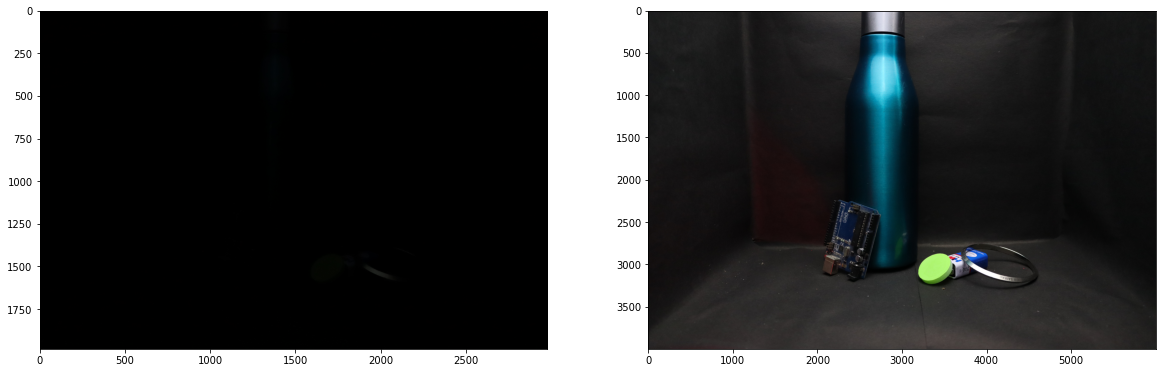

In [75]:
dataset_no = 2

short = plt.imread( os.path.join(
        current_dir,
        os.path.join("dataset/" + str(dataset_no), str(dataset_no) + ".JPG"),
    ))
long = plt.imread(os.path.join(
        current_dir,
        os.path.join("dataset/" + str(dataset_no), str(dataset_no) + "_high.JPG"),
    ))
fig, ax = plt.subplots(1, 2, figsize = (20, 20))
ax[0].imshow(short)
ax[1].imshow(long)

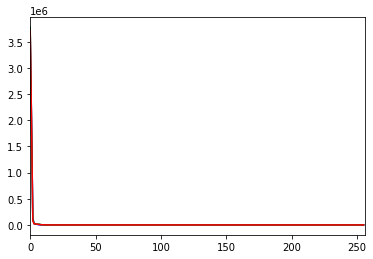

In [76]:
plot_hist(short)

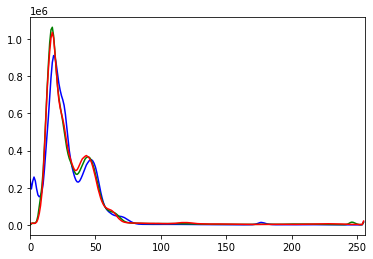

In [77]:
plot_hist(long)

In [78]:
def equalize_hist(img):
    """
    Runs the equalizeHist over each channel and cats them
    for output
    
    :param img: Input image of RGB format
    """
    res = []
    for channel in np.dsplit(img, img.shape[-1]):
        res.append(cv2.equalizeHist(channel))
    res = np.dstack(res)
    plt.imshow(res)
    return res

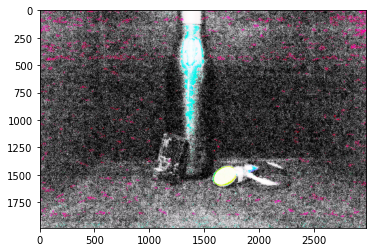

In [79]:
short_eq = equalize_hist(short)

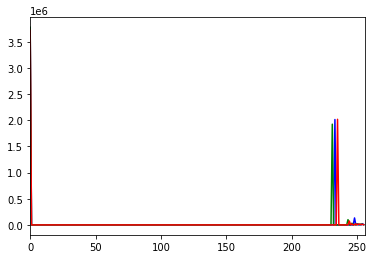

In [80]:
plot_hist(short_eq)

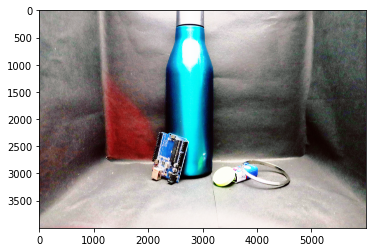

In [81]:
long_eq = equalize_hist(long)

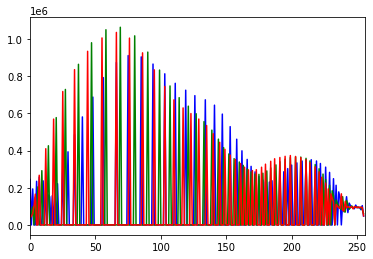

In [82]:
plot_hist(long_eq)

In [83]:
def clahe(img):
    """
    :param img: Input image of RGB format
    """
    res = []
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    for channel in np.dsplit(img, img.shape[-1]):
        res.append(clahe.apply(channel))
    res = np.dstack(res)
    plt.imshow(res)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


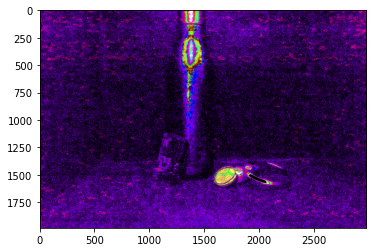

In [84]:
# def denoise(img):
#     dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
#     plt.imshow(dst)

from scipy import ndimage

def scfilter(image, iterations=1, kernel=2, disp=False):
        """
        Sine‐cosine filter.
        kernel can be tuple or single value.
        Returns filtered image.
        """
        image = np.array(image, dtype=np.int64)
        for n in range(iterations):
            image = np.arctan2(
                ndimage.filters.uniform_filter(np.sin(image), size=kernel),
                ndimage.filters.uniform_filter(np.cos(image), size=kernel),
            )
        if disp:
            plt.imshow(image)
        return image

op = scfilter(short_eq,iterations=2,kernel=0.001, disp=True)

In [85]:
def filter(im):
    morph = im.copy()

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
    morph = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, kernel)
    morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

    # take morphological gradient
    gradient_image = cv2.morphologyEx(morph, cv2.MORPH_GRADIENT, kernel)

    # split the gradient image into channels
    image_channels = np.split(np.asarray(gradient_image), 3, axis=2)

    channel_height, channel_width, _ = image_channels[0].shape

    # apply Otsu threshold to each channel
    for i in range(0, 3):
        _, image_channels[i] = cv2.threshold(~image_channels[i], 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)
        image_channels[i] = np.reshape(image_channels[i], newshape=(channel_height, channel_width, 1))

    # merge the channels
    image_channels = np.concatenate((image_channels[0], image_channels[1], image_channels[2]), axis=2)
    return image_channels


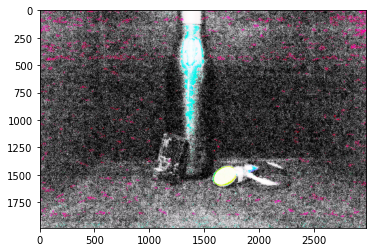

In [92]:
plt.imshow(short_eq)

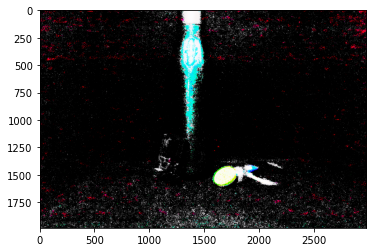

In [91]:
# op = filter(short_eq)
kernel = np.ones((3, 3), np.uint8) 
for i in range(2):
    op= cv2.erode(short_eq, kernel= kernel)

plt.imshow(op)